In [27]:
#The purpose is to gain deep, hands-on experience with KNN, cross validation, and selection of model parameters. 
#Although the Scikit-learn package provides nicely packaged methods, cross-validation is such an important concept 
#that we will implement it ourselves in this assignment. We will then use our implementation of cross-validation 
#to select some model parameters – also called “hyperparameters” – for our KNN classifier on the Iris dataset.

#1 Implement KNN classification, using the sklearn package. We learned how to do this in class. See also: http://scikit-learn.org/stable/modules/neighbors.html#nearest- neighbors-classification

# comment > applying Apply the k-NN Algorithm, Using Cross Validation, Apply Scaling

%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.datasets import load_iris

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=8)

knn = KNeighborsClassifier(3).fit(X_train,y_train)

knn.score(X_test, y_test)

0.93333333333333335

In [39]:
#2 Use the sklearn package to implement cross-validation for your classifier. Use 5 folds for 
#your cross-validation. See also: http://scikit-learn.org/stable/modules/cross_validation.html#

from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, feature_selection
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import scale

from sklearn.datasets import load_iris
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

clf = neighbors.KNeighborsClassifier(11, weights='uniform')
clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris_df.values, iris.target, cv=5)

print scores
print scores.mean()

# got this prior for #1  0.93333333333333335

[ 0.93333333  1.          1.          0.96666667  1.        ]
0.98


In [49]:
##3 Use your KNN classifier and cross-validation code from (1) and (2) above to determine the optimal value of K 
#(number of nearest neighbors to consult) for this Iris dataset. Hint: This hyperparameter will be a number between 
#1 and 150 :)

n_neighbors = range(1, 51)
print n_neighbors

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [50]:
scorez = []
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    scorez.append((clf.score(X_test, y_test)))
    
print scorez

[0.93333333333333335, 0.93333333333333335, 0.93333333333333335, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.97777777777777775, 0.97777777777777775, 0.9555555555555556, 0.97777777777777775, 0.93333333333333335, 0.93333333333333335, 0.9555555555555556, 0.93333333333333335, 0.9555555555555556, 0.93333333333333335, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.93333333333333335, 0.91111111111111109, 0.91111111111111109, 0.93333333333333335, 0.93333333333333335, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.93333333333333335, 0.93333333333333335, 0.93333333333333335, 0.93333333333333335, 0.93333333333333335, 0.91111111111111109, 0.91111111111111109, 0.91111111111111109, 0.93333333333333335, 0.91111111111111109, 0.91111111111111109, 0.91111111111111109, 0.88888888888888884, 0.88888888888888884, 0.88888888888888884, 0.91111111111111109, 0.91111111111111109, 0.91111111111111109, 0.88888888888888884, 0.88888888888888884, 0.91111111111111109, 0.8

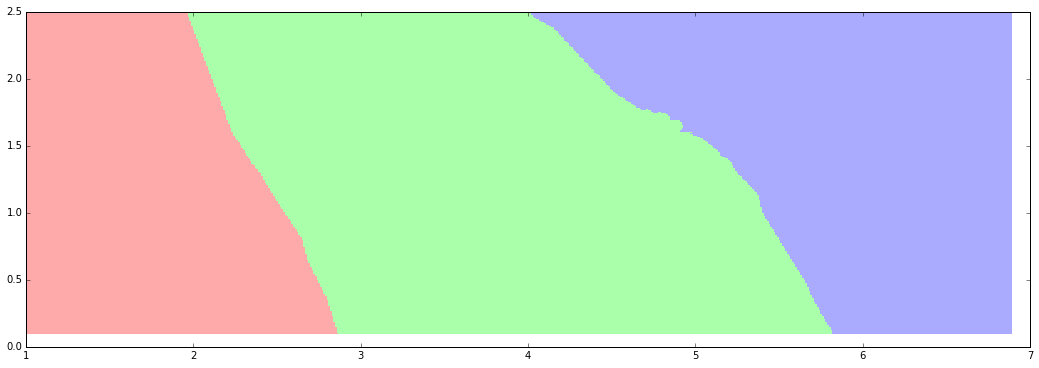

In [51]:
#4 Using matplotlib, plot classifier accuracy versus the hyperparameter K for a range of K that you consider interesting. 
#Explain in words what you are seeing.

clf = neighbors.KNeighborsClassifier(11, weights='uniform')
clf.fit(iris.data[:, 2:4], iris.target)


h = 0.01

# Creating color map
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plotting the decision boundary.
x_min, y_min = iris_df.min()[['petal length (cm)', 'petal width (cm)']]
x_max, y_max = iris_df.max()[['petal length (cm)', 'petal width (cm)']]

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Putting the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(figsize=(18,6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)



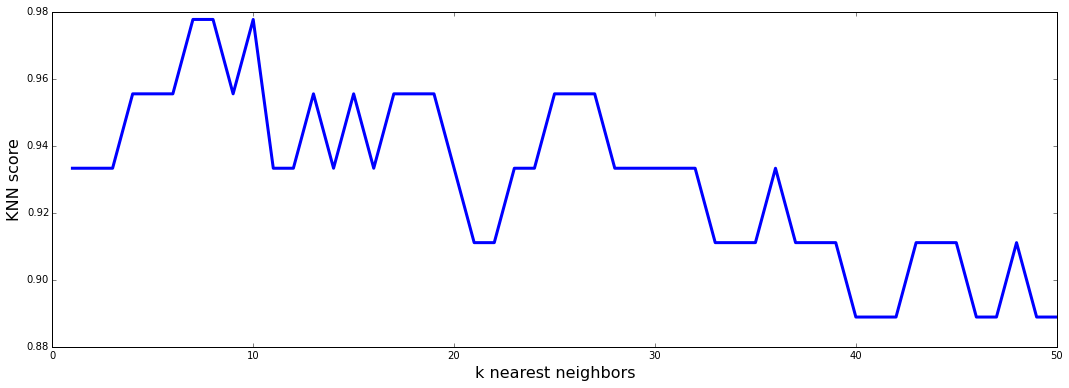

In [53]:
plt.figure(figsize=(18,6))
_ = plt.plot(n_neighbors, scorez, linewidth=3.0)
plt.xlabel('k nearest neighbors', fontsize=16)
plt.ylabel('KNN score', fontsize=16)


In [ ]:
#5 Now, write your own implementation of cross-validation in Python without using the cross-validation methods from sklearn. 
#Cross validation is a very important concept. Implementing it yourself in Python is the best way to learn and understand it. 
#Compare the results of your cross-validation code with your results using the cross-validation in sklearn.

#follow steps for cross validation
#randomly split dataset into equal partitions
#use partition 1 as test set & union of other partitions as training set.
# find generalization error.
# repeat steps 2-3 using a different partition as the test set at each iteration.
#take the average generalization error as the estimate of 00S accuracy.

import random

#def cv(data, folds):
    #accuracies = []
    #random.shuffle(array)
    #(data)
    
# cross validation CV used to evaluate the model you have built. 
# Nature of the data is fair to shuffle? Sometimes it's just not.
    
#    from sklearn.datasets import load_iris
#from sklearn.preprocessing import scale
#iris = datasets.load_iris()
#import random
#import numpy

#def cross_validate(data, folds):
   accuracies = []
   #1 shuffle the data 
   random.shuffle(data)
   #2 split it into n parts
   folds = numpy.array_split(data, folds,0)
   #3 loop through the parts, first use 1 as test, 1+ for training, 2 as test, etc.
   #for i in folds:
       #knn
        #take mean of knn for folds
        #mean.knn
   #4 compare and test the accuracy for each set
   #5 average those acuracies
   
   return folds

In [ ]:
#6  Using the value of K obtained in (3) above, vary the number of folds used 
#for cross-validation across an interesting range, e.g. [ 2, 3, 5, 6, 10, 15]. 
#How does classifier accuracy vary with the number of folds used? Do you think there exists an optimal 
#number of folds to use for this particular problem? Why or why not? ￼

In [ ]:
##7 Write your own implementation of KNN classification in Python, without using the methods from sklearn. 
#Compare your results with the results you obtained using sklearn.